# loan approval prediction 

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import pickle

In [47]:
data=pd.read_csv('loan_approval_dataset.csv')
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [48]:
data.set_index('loan_id', inplace=True)


In [49]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [50]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [51]:
# to remove extra space 
data.columns=data.columns.str.strip()
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [53]:
data['assets']=data.residential_assets_value+data.commercial_assets_value+data.luxury_assets_value+data.bank_asset_value

In [54]:
data.drop(columns=['residential_assets_value', 'commercial_assets_value','luxury_assets_value','bank_asset_value'],inplace=True)

In [55]:
data.isnull().sum()


no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64

In [56]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [57]:
def clean_dataset(st):
    st=st.strip()
    return st
clean_dataset(' Graduate')

'Graduate'

In [58]:
data.education=data.education.apply(clean_dataset)

In [59]:
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [60]:
data['education'] = data['education'].map({'Graduate': 0, 'Not Graduate': 1})


In [61]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [62]:
data.self_employed=data.self_employed.apply(clean_dataset)

In [63]:
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [64]:
data['self_employed'] = data['self_employed'].map({'No': 0, 'Yes': 1})

In [65]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [66]:
data.loan_status=data.loan_status.apply(clean_dataset)

In [67]:
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [68]:
data['loan_status'] = data['loan_status'].map({'Rejected': 0, 'Approved': 1})

In [69]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
loan_id,,,,,,,,,
1,2,0,0,9600000,29900000,12,778,1,50700000
2,0,1,1,4100000,12200000,8,417,0,17000000
3,3,0,0,9100000,29700000,20,506,0,57700000
4,3,0,0,8200000,30700000,8,467,0,52700000
5,5,1,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4265,5,0,1,1000000,2300000,12,317,0,7400000
4266,0,1,1,3300000,11300000,20,559,1,20000000
4267,2,1,0,6500000,23900000,18,457,0,39000000


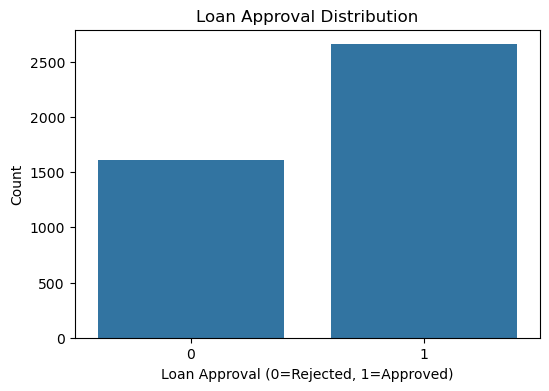

In [70]:

# 3.1 Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Approval (0=Rejected, 1=Approved)')
plt.ylabel('Count')
plt.show()

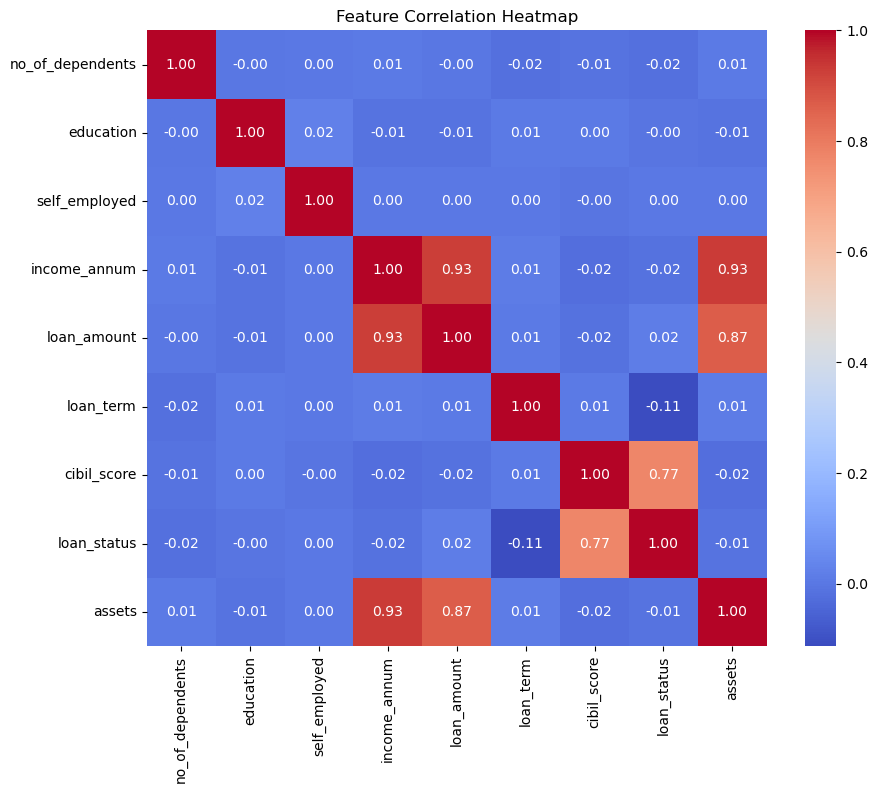

In [71]:
# 3.2 Correlation heatmap
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [72]:
# Count of approval and rejection
approval_rejection_counts = data['loan_status'].value_counts()
print("Approval / Rejection counts:")
print(approval_rejection_counts)

# Percentage of approval and rejection
approval_rejection_percentage = data['loan_status'].value_counts(normalize=True) * 100
print("\nApproval / Rejection distribution (%):")
print(approval_rejection_percentage)

Approval / Rejection counts:
loan_status
1    2656
0    1613
Name: count, dtype: int64

Approval / Rejection distribution (%):
loan_status
1    62.215976
0    37.784024
Name: proportion, dtype: float64


In [74]:
# Step 4: Define Features and Target
input_data = data.drop('loan_status', axis=1)
output_data= data['loan_status']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

In [79]:
# For training set
zero_var_train = [col for col in x_train.columns if x_train[col].nunique() <= 1]
print("Zero variance columns in TRAIN data:", zero_var_train)

# For test set
zero_var_test = [col for col in x_test.columns if x_test[col].nunique() <= 1]
print("Zero variance columns in TEST data:", zero_var_test)


Zero variance columns in TRAIN data: []
Zero variance columns in TEST data: []


In [ ]:
zero_var_cols = [col for col in X.columns if X[col].nunique() <= 1]
print("Zero variance columns:", zero_var_cols)


In [78]:
print("NaN values:\n", data.isnull().sum())
print("Infinite values:\n", np.isinf(data).sum())


NaN values:
 no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64
Infinite values:
 no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64


In [80]:
# Optional: scale down large numeric columns before StandardScaler
X[['income_annum', 'loan_amount', 'assets']] = X[['income_annum', 'loan_amount', 'assets']] / 1e6


In [81]:
# Step 6: Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [82]:
# Step 7: Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(x_train_scaled, y_train)
y_pred_lr = log_reg.predict(x_test_scaled)
y_proba_lr = log_reg.predict_proba(x_test_scaled)[:,1]

In [83]:

# Step 8: Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:,1]

In [84]:
# Step 9: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Logistic Regression ---
Accuracy: 0.9133
Precision: 0.9368
Recall: 0.9226
F1 Score: 0.9297
ROC-AUC: 0.9104

--- Random Forest ---
Accuracy: 0.9824
Precision: 0.9813
Recall: 0.9906
F1 Score: 0.9859
ROC-AUC: 0.9799



In [85]:
# Step 10: Cross-validation
cv_lr = cross_val_score(log_reg, x_train_scaled, y_train, cv=5, scoring='accuracy').mean()
cv_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy').mean()

print(f"Logistic Regression CV Accuracy: {cv_lr:.4f}")
print(f"Random Forest CV Accuracy: {cv_rf:.4f}")



Logistic Regression CV Accuracy: 0.9163
Random Forest CV Accuracy: 0.9786


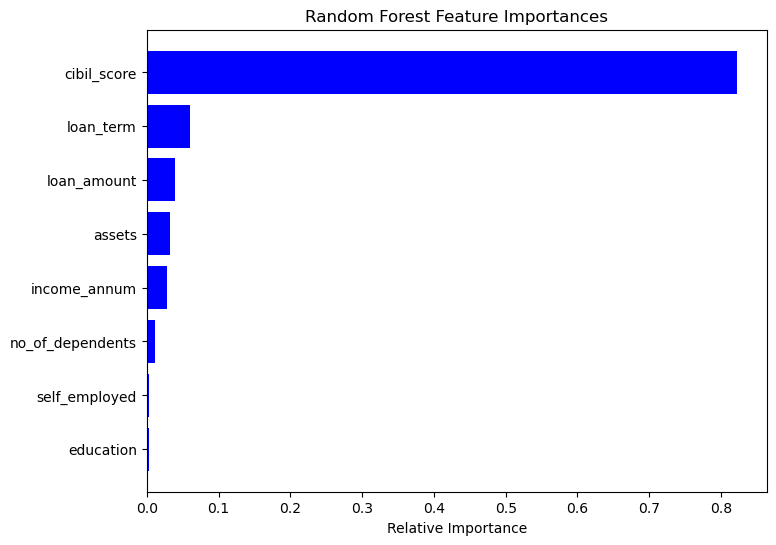

In [86]:
# Step 11: Feature Importance Plot (Random Forest)
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(8,6))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Step 12: ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Step 13: Final Model Training (Random Forest)
final_model = RandomForestClassifier(random_state=42)
final_model.fit(x_train, y_train)

In [ ]:


# Add the classification report here
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


In [ ]:
# Step 14: Save Model and Scaler
pickle.dump(final_model, open('random_forest_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:

# Step 15: Load Model and Predict New Data Example
loaded_model = pickle.load(open('random_forest_model.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
new_applicant = pd.DataFrame([{
    'no_of_dependents': 2,
    'education': 0,
    'self_employed': 0,
    'income_annum': 9600000,
    'loan_amount': 29900000,
    'loan_term': 12,
    'cibil_score': 778,
    'assets': 50700000
}])
new_applicant_scaled = loaded_scaler.transform(new_applicant)
loan_approval_pred = loaded_model.predict(new_applicant_scaled)
print("Loan Approval Prediction (1=Approved, 0=Rejected):", loan_approval_pred[0])